Single spillover branching process with single mutation toggle. Plots probabilities of outbreak.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
###################################################
# simulates infection WITHOUT recurrent spillover 
# allows R0 to mutate between three possible values.          
#
# also note that if the infection goes extinct the time of extinction is well-defined, and either implementation computes it correctly.
###################################################
#
# input R_0 is transmission rate of the initial/standard variant.
# input R_1 is the transmission rate of the intermediate variant.
# input R_2 is the transmission rate of the final variant
#
# input mu represents mutation rate.
#
###################################################
#
# returns 0 if extinction
# returns 1 if outbreak
#
###################################################

def sim(R_0, R_1, R_2, mu):
    
    outbreak_thresh = 100 #call it an outbreak if this many people are infected
    
    t = 0
    
    #store number of cases with R_0, number of cases with R_1, number of cases with R_2
    I_0 = 1
    I_1 = 0
    I_2 = 0
    
    while True: 
            
        #branch by one generation.

#########################################################################################
######### Assuming the total number of secondary infections negative-binomially distributed without backwards mutation #####
######### (i.e. geometrically distributed for each individual)

        if I_0 > 0:
            #number of new infections generated by people of type 0
            n0 = np.random.negative_binomial(I_0, 1/(R_0 + 1)) #draw the number of failures that happen before I_0 successes occur, where the probability of success (i.e. recovery) is 1/(R_0+1)
        
            #figure out how many of those are type 0 and type 1
            rand = np.random.choice(2, n0, p=[1-mu, mu]) #randomly draw an array of 0s and 1s, where each draw has 1-mu probability of being a 0, and mu probability of being a 1.
            s = rand.sum() #count up total number of 1s drawn (corresponds to number of type 1 infections)
            n00 = n0-s #number that are type 0
            n01 = s #number that are type 1   
            
        else: n00 = 0; n01 = 0
    
        if I_1 > 0 :
            #number of new infections generated by people of type 1
            n1 = np.random.negative_binomial(I_1, 1/(R_1 + 1)) #draw the number of failures that happen before I_1 successes occur, where the probability of success (i.e. recovery) is 1/(R_1+1)
        
            #figure out how many of those are type 1 and type 2
            rand = np.random.choice(2, n1, p=[1-mu, mu]) #randomly draw an array of 0s and 1s, where each draw has 1-mu probability of being a 0, and mu probability of being a 1.
            s = rand.sum() #count up total number of 1s drawn (corresponds to number of type 2 infections)
            n11 = n1-s #number that are type 1
            n12 = s #number that are type 2   
            
        else: n11 = 0; n12 = 0
            
        if I_2 > 0 :
            #number of new infections generated by people of type 2 (all are type 2)
            n2 = np.random.negative_binomial(I_2, 1/(R_2 + 1))
            
        else: n2 = 0  

        #update totals
        I_0 = n00
        I_1 = n01 + n11
        I_2 = n12 + n2

#########################################################################################

# #########################################################################################
# ######### Assuming the total number of secondary infections negative-binomially distributed with backwards mutation #####
# ######### (i.e. geometrically distributed for each individual)

#         if I_0 > 0:
#             #number of new infections generated by people of type 0
#             n0 = np.random.negative_binomial(I_0, 1/(R_0 + 1)) #draw the number of failures that happen before I_0 successes occur, where the probability of success (i.e. recovery) is 1/(R_0+1)
        
#             #figure out how many of those are type 0 and type 1
#             rand = np.random.choice(2, n0, p=[1-mu, mu]) #randomly draw an array of 0s and 1s, where each draw has 1-mu probability of being a 0, and mu probability of being a 1.
#             s = rand.sum() #count up total number of 1s drawn (corresponds to number of type 1 infections)
#             n00 = n0-s #number that are type 0
#             n01 = s #number that are type 1   
            
#         else: n00 = 0; n01 = 0
    
#         if I_1 > 0 :
            
#             #number of new infections generated by people of type 1
#             n1 = np.random.negative_binomial(I_1, 1/(R_1 + 1)) #draw the number of failures that happen before I_1 successes occur, where the probability of success (i.e. recovery) is 1/(R_1+1)
        
#             #figure out how many of those are type 0 and type 1
#             rand = np.random.choice(2, n1, p=[mu, 1-mu]) #randomly draw an array of 0s and 1s, where each draw has mu probability of being a 0, and 1-mu probability of being a 1.
#             s = rand.sum() #count up total number of 1s drawn (corresponds to number of type 1 infections)
#             n10 = n1-s #number that are type 0
#             n11 = s #number that are type 1 
            
#         else: n10 = 0; n11 = 0

#         #update totals
#         I_0 = n00 + n10
#         I_1 = n01 + n11

#########################################################################################

        #check if we reached the outbreak threshold
        if I_0 + I_1 + I_2 > outbreak_thresh:
            return 1
        
        #check if we reached extinction
        if I_0 + I_1 + I_2 == 0:
            return 0

In [9]:
#########################
# runs many simulations #
#########################
#
# optional input N_sims is number of simulations to run.
#
# returns the percentage of those simulations that outbreak
#
#########################

def sim_percentage(R_0, R_1, R_2, mu, N_sims=1000):   
    N_outbreaks = 0  
    for i in range(N_sims):
        if sim(R_0, R_1, R_2, mu) == 1: N_outbreaks += 1
    return N_outbreaks/N_sims

In [11]:
# run a single simulation

#parameters
R_0 = 1.5
R_1 = 0
R_2 = 0
mu = 0

sim(R_0, R_1, R_2, mu)

0

In [12]:
# run a bulk simulation

#parameters

R_0 = 1.5
R_1 = 0
R_2 = 0
mu = 0

sim_percentage(R_0, R_1, R_2, mu, N_sims=10)

0.4

In [57]:
#################################################################
# for a fixed mu, R_1, and R_2, plots the probability of outbreak against R_0 #
#################################################################
#
# inputs mu, R_1, R_2
#
# optional inputs R0_min, R0_max give range of R_0 to plot over.
# optional input N_points gives number of points to plot.
# optional inputs N_sims gives number of simulations to run per point.
#
################################################################

def prob_plot(mu, R_1, R_2, R0_min=0.001, R0_max=2.5, N_points = 75, N_sims=750):

    # initialize arrays to be plotted
    R0 = []; percent = []
    
    # Take some evenly spaced R_0 values
    R0 = np.linspace(R0_min, R0_max, N_points)

#     #simulate percentages of outbreak
#     for r_0 in R0:
#         percent = np.append(percent, sim_percentage(r_0, R_1, mu, N_sims))
        
#     #make the plot
#     plt.plot(R0, percent, "ob")
    
    #graph the actual probability of outbreak with no mutation
    #################################################################
    # From Linda's talk: the actual probability of outbreak with no mutation is:
    #                            0 if R_0 < 1
    #                            1-1/R_0 if R_0 > 1
    #################################################################
    plt.plot(R0, np.piecewise(R0, [R0<1, R0>=1], [0, lambda R0: 1-1/R0]), "r", label='probability without mutation')
    plt.title('mu = {}'.format(mu))
    plt.xlabel("R_0"); plt.ylabel("p")
    plt.xlim(R0_min, R0_max)
    
    #graph the actual probability of outbreak with mutation and without backwards mutation, and without intermediate mutation
    #################################################################
    # The actual probability of outbreak with mutation and without backwards mutation, assuming R_1 > 1:
    #                            1-(-1 + R_0*(mu*(1/R_2)-1) + sqrt(1 - 2*R_0*(1+mu*(1/R_2-2))+R_0^2*(mu/R_2-1)^2))/(2*R_0*(mu-1))
    #################################################################

    plt.plot(R0, 1-(-1 + R0*(mu*(1/R_2)-1) + np.sqrt(1 - 2*R0*(1+mu*(1/R_2-2))+R0**2*(mu/R_2-1)**2))/(2*R0*(mu-1)), "g", label='probability with mutation')

    #################################################################
    
    #simulate percentages of outbreak
    for r_0 in R0:
        percent = np.append(percent, sim_percentage(r_0, R_1, R_2, mu, N_sims))
        
    #make the plot
    plt.plot(R0, percent, "ob")
    
    #plt.yscale("log") #graph with y axis on a log scale!
    #plt.ylim(0.000001, 1)
    
    plt.legend()
    plt.show()

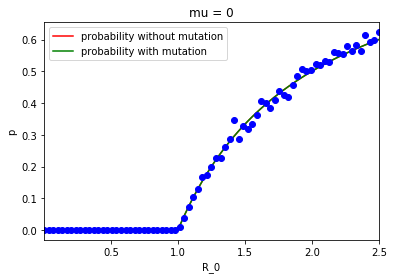

CPU times: user 8.17 s, sys: 44.1 ms, total: 8.21 s
Wall time: 8.44 s


In [58]:
%%time

# SANITY CHECK
# When there is no mutation, check that our simulation agrees with the correct probability
# (it doesn't matter what R_1 and R_2 are here, but setting them equal to 0 will give an error)

prob_plot(mu=0, R_1 = 1.5, R_2 = 1.5)

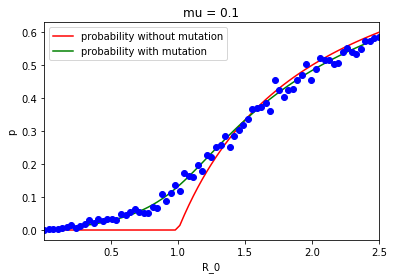

CPU times: user 10.1 s, sys: 27.3 ms, total: 10.2 s
Wall time: 10.2 s


In [59]:
%%time

# SANITY CHECK 2
# When R_1 = R_2, check that our simulation agrees with the correct probability

mu=0.1
R_1 = 1.5
R_2 = R_1

prob_plot(mu, R_1, R_2)

Simulate some other values of mu. Note the scale changes on the axes

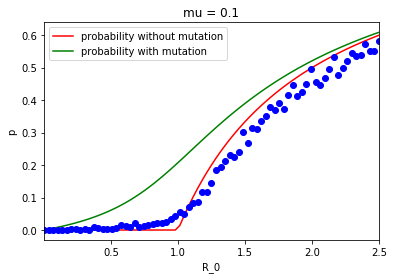

CPU times: user 9.98 s, sys: 25.6 ms, total: 10 s
Wall time: 10.1 s


In [60]:
%%time

prob_plot(mu=0.1, R_1 = 0.5, R_2 = 4)

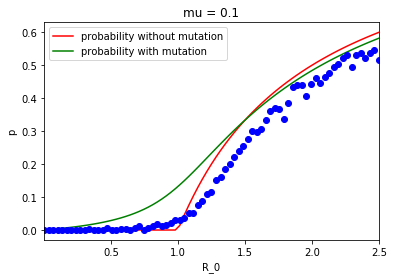

CPU times: user 10.7 s, sys: 30.1 ms, total: 10.7 s
Wall time: 10.9 s


In [61]:
%%time

prob_plot(mu=0.1, R_1 = 0.5, R_2 = 1.5)

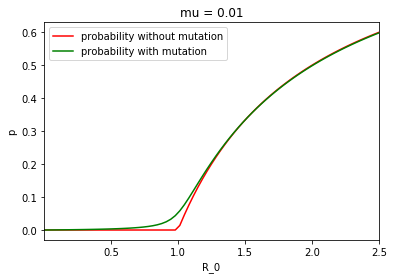

CPU times: user 262 ms, sys: 13.2 ms, total: 275 ms
Wall time: 374 ms


In [10]:
%%time

prob_plot(mu=0.01, R_1 = 1.5)

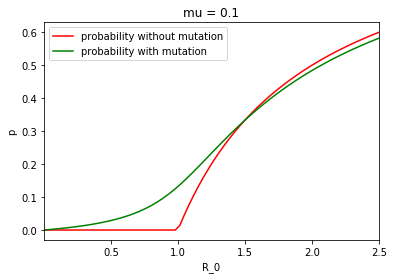

CPU times: user 301 ms, sys: 13.5 ms, total: 315 ms
Wall time: 468 ms


In [11]:
%%time

prob_plot(mu=0.1, R_1 = 1.5)

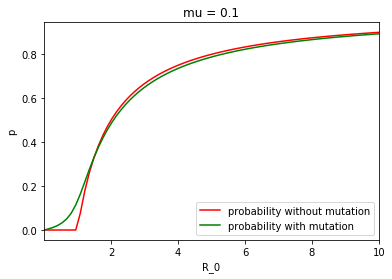

CPU times: user 193 ms, sys: 9.51 ms, total: 202 ms
Wall time: 224 ms


In [12]:
%%time

#zoom out
prob_plot(mu=0.1, R_1 = 1.5, R0_max=10)

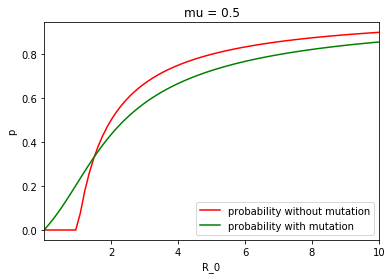

CPU times: user 205 ms, sys: 10.1 ms, total: 215 ms
Wall time: 252 ms


In [13]:
%%time

prob_plot(mu=0.5, R_1 = 1.5, R0_max=10)

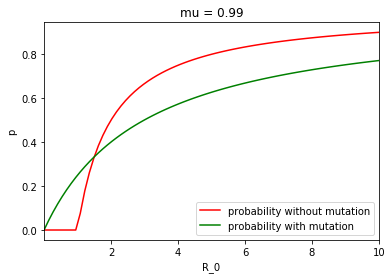

CPU times: user 270 ms, sys: 13.3 ms, total: 284 ms
Wall time: 393 ms


In [14]:
%%time

prob_plot(mu=0.99, R_1 = 1.5, R0_max=10)